<a href="https://colab.research.google.com/github/ahyen/ML-assignment/blob/master/Assingment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
cd ../content/drive/My Drive/Colab Notebooks/ML

/content/drive/My Drive/Colab Notebooks/ML


In [0]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):
    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)
    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

In [0]:
#split data to train and test
x = list_image[:, 0 : 1000]
x_test = list_image[:, 1000 :]

label = list_label[0 : 1000]
label_test = list_label[1000 :]
label_one_hot = np.eye(10)[label]
label_test_one_hot = np.eye(10)[label_test]

In [0]:
#set training parameter
np.random.seed(100)
u = np.random.randn(196, 784)
v = np.random.randn(49, 196)
w = np.random.randn(10, 49)
bias1 = np.random.randn(1)
bias2 = np.random.randn(1)
bias3 = np.random.randn(1)

In [0]:
learning_rate = 0.01
lambda_ = 0.0001
cost_list = []
accuracy_list = []
test_cost_list = []
test_accuracy_list = []

for epoch in range(1000):
  correct = 0
  correct_test = 0
  if epoch >800:
    learning_rate = 0.0001
  for i in range(1000):
    x_train = x[:, i]
    label = label_one_hot[i]

    #first hidden layer
    y_ = (np.dot(u, x_train)) + bias1
    y = 1/(1+np.exp(-y_))

    #second hidden layer
    z_ = (np.dot(v, y)) + bias2
    z = 1/(1+np.exp(-z_))

    #output layer
    h_ = (np.dot(w, z)) + bias3
    h = 1/(1+np.exp(-h_))

    # accuracy
    if (h.argmax() == label.argmax()):
      correct += 1

    #cost
    cost =+ np.sum(- label * np.log(h) - (1- label)*np.log(1 - h)) + (lambda_/327516) * (np.sum(w*w) + np.sum(v*v) + np.sum(u*u))
    
    delta3 = (h - label) * h * (1 - h)
    bias3 = bias3 - learning_rate * delta3

    delta2 = np.dot(w.T, delta3) * z * (1 - z)
    bias2 = bias2 - learning_rate * delta2

    delta1 = np.dot(v.T, delta2) * y * (1 - y)
    bias1 = bias1 - learning_rate * delta1

    #Gradient descent
    w = w - learning_rate * (np.dot(delta3.reshape(10, 1), z.reshape(1, 49)) + (lambda_/490)*w)
    v = v - learning_rate * (np.dot(delta2.reshape(49, 1), y.reshape(1, 196)) + (lambda_/49*196)*v)
    u = u - learning_rate * (np.dot(delta1.reshape(196, 1), x_train.reshape(1, 784)) + (lambda_/196*784)*u)

  accuracy_list.append(correct/1000)
  print(epoch, ":", correct/1000)
  cost_list.append(cost/1000)
  
  for i in range(9000):
    x_test_data = x_test[:, i]
    label_test = label_test_one_hot[i]

    test_y_ = (np.dot(u, x_test_data)) + bias1
    test_y = 1/(1+np.exp(-test_y_))

    test_z_ = (np.dot(v, test_y)) + bias2
    test_z = 1/(1+np.exp(-test_z_))

    test_h_ = (np.dot(w, test_z)) + bias3
    test_h = 1/(1+np.exp(-test_h_))

    if (test_h.argmax() == label_test.argmax()):
      correct_test += 1

    test_cost =+ np.sum(- label_test * np.log(test_h) - (1- label_test)*np.log(1 - test_h)) +  (lambda_/327516) * (np.sum(w*w) + np.sum(v*v) + np.sum(u*u))
  test_accuracy_list.append(correct_test/9000)
  print("test:" , correct_test/9000)
  test_cost_list.append(test_cost/9000)

0 : 0.165
test: 0.173
1 : 0.219
test: 0.188
2 : 0.245
test: 0.20377777777777778
3 : 0.259
test: 0.214
4 : 0.271
test: 0.22433333333333333
5 : 0.29
test: 0.23333333333333334
6 : 0.3
test: 0.24388888888888888
7 : 0.317
test: 0.2521111111111111


In [0]:
#test using final parameter
classified_list = []
misclassified_list = []
predict_list = []
for i in range(9000):
  x_test_data = x_test[:, i]
  label_test = label_test_one_hot[i]

  test_y_ = (np.dot(u, x_test_data)) + bias1
  test_y = 1/(1 + np.exp(-test_y_))
  
  test_z_ = (np.dot(v, test_y)) + bias2
  test_z = 1/(1+np.exp(-test_z_))

  test_h_ = (np.dot(w, test_z)) + bias3
  test_h = 1/(1+np.exp(-test_h_))

  if (test_h.argmax() == label_test.argmax()):
    classified_list.append(i)
  else:
    misclassified_list.append(i)
  predict_list.append(test_h.argmax())



---

# **Result**

### **1. Plot the loss curve**

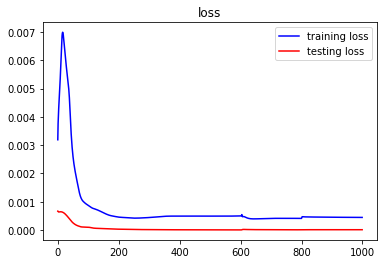

In [34]:
plt.plot(range(0, 1000), cost_list, 'b', label = 'training loss')
plt.plot(range(0, 1000), test_cost_list, 'r', label = 'testing loss')
plt.title('loss')
plt.legend()
plt.show()

### **2. Plot the accuracy curve**

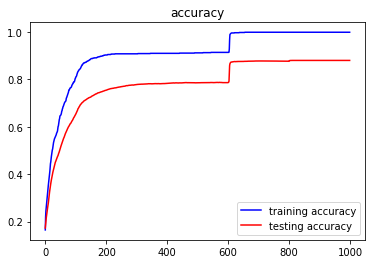

In [35]:
plt.plot(range(0, 1000), accuracy_list, 'b', label = 'training accuracy')
plt.plot(range(0, 1000), test_accuracy_list, 'r', label = 'testing accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

### **3. Plot the accuracy value**

In [36]:
print("final training accuracy : ", accuracy_list[-1] * 100, "%")
print("final testing accuracy : ", test_accuracy_list[-1] * 100, "%")

final training accuracy :  99.9 %
final testing accuracy :  88.0111111111111 %


### **4. Plot the classification**

**correctly classified testing images**

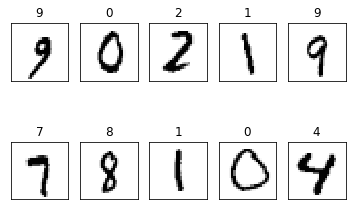

In [37]:
for i in range(10):
    index = classified_list[i]
    plt.subplot(2, 5, i+1)
    plt.title(predict_list[index])
    plt.imshow(x_test[:, index].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


**misclassified testing images**

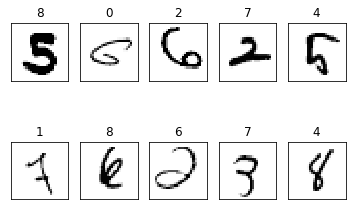

In [38]:
for i in range(10):
    index = misclassified_list[i]
    plt.subplot(2, 5, i+1)
    plt.title(predict_list[index])
    plt.imshow(x_test[:, index].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()